### Multilayer perceptron

In [1]:
import pandas as pd


In [2]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [3]:
#import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# Read the dataset
data = pd.read_csv("./data_all_dfeatures.csv")

In [5]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [6]:
from tensorflow.keras.layers import Dense,Input,Activation,Dropout
from tensorflow.keras import Model
from tensorflow.keras import Sequential
import random as rn
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import datetime

In [7]:
num_classes = 2

In [8]:
from tensorflow.keras.layers import PReLU

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model4():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(130,), name='input_layer'),
        Dense(64, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [16]:
model4 = create_model4()
model4.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                8384      
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [17]:
model4.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test),
           batch_size=16)

Train on 140842 samples, validate on 19868 samples
Epoch 1/10
140842/140842 [==============================] - 30s 212us/sample - loss: 0.1024 - accuracy: 0.8698 - val_loss: 0.1158 - val_accuracy: 0.8715
Epoch 2/10
140842/140842 [==============================] - 27s 195us/sample - loss: 0.0923 - accuracy: 0.8843 - val_loss: 0.1180 - val_accuracy: 0.8616
Epoch 3/10
140842/140842 [==============================] - 28s 198us/sample - loss: 0.0895 - accuracy: 0.8873 - val_loss: 0.1187 - val_accuracy: 0.8597
Epoch 4/10
140842/140842 [==============================] - 28s 199us/sample - loss: 0.0885 - accuracy: 0.8894 - val_loss: 0.1343 - val_accuracy: 0.8352
Epoch 5/10
140842/140842 [==============================] - 29s 205us/sample - loss: 0.0878 - accuracy: 0.8906 - val_loss: 0.1167 - val_accuracy: 0.8658
Epoch 6/10
140842/140842 [==============================] - 30s 212us/sample - loss: 0.0872 - accuracy: 0.8915 - val_loss: 0.1168 - val_accuracy: 0.8628
Epoch 7/10
140842/140842 [=====

In [22]:
model4.history.history['loss']

[0.10237975341724387,
 0.0922653718617066,
 0.08953007611790986,
 0.08854472503347248,
 0.08781694153274235,
 0.08724850120286443,
 0.08772736884313936,
 0.086718868259911,
 0.08645133020864182,
 0.08591046862392429]

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [19]:

# predict probabilities for test set
yhat_probs = model4.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model4.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# kappa
# kappa = cohen_kappa_score(testy, yhat_classes)
# print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.861133
Precision: 0.141618
Recall: 0.043305
F1 score: 0.066328
ROC AUC: 0.563976
[[17011   594]
 [ 2165    98]]


In [20]:
from matplotlib import pyplot

Train: 0.899, Test: 0.861


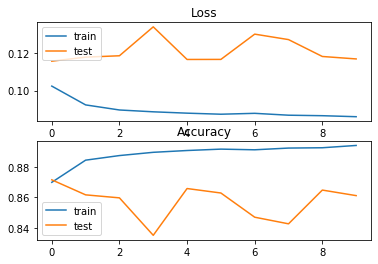

In [26]:
# evaluate the model
_, train_acc = model4.evaluate(X_train, y_train, verbose=0)
_, test_acc = model4.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(model4.history.history['loss'], label='train')
pyplot.plot(model4.history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(model4.history.history['accuracy'], label='train')
pyplot.plot(model4.history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()